In [ ]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#### Part A: Basic EDA (Exploratory Data Analysis)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Load the dataset into a Pandas DataFrame and display the first 5 rows.
# to load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/Datasets/HRDataset_v14.csv")
#to display the first 5 rows in the data
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
# 2. Check the shape of the dataset (rows, columns).
df.shape

(311, 36)

In [ ]:
# 3. Display the column names and their data types.
df.dtypes

,0
Employee_Name,object
EmpID,int64
MarriedID,int64
MaritalStatusID,int64
GenderID,int64
EmpStatusID,int64
DeptID,int64
PerfScoreID,int64
FromDiversityJobFairID,int64
Salary,int64


In [ ]:
#4. Find the number of unique values in each column.
df.nunique()

,0
Employee_Name,311
EmpID,311
MarriedID,2
MaritalStatusID,5
GenderID,2
EmpStatusID,5
DeptID,6
PerfScoreID,4
FromDiversityJobFairID,2
Salary,308


In [ ]:
# 5. Identify missing values in the dataset and list columns with nulls.
df.isnull().sum()

,0
Employee_Name,0
EmpID,0
MarriedID,0
MaritalStatusID,0
GenderID,0
EmpStatusID,0
DeptID,0
PerfScoreID,0
FromDiversityJobFairID,0
Salary,0


In [ ]:
# 6. Describe the numerical columns (mean, median, std).
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


<Axes: ylabel='Frequency'>

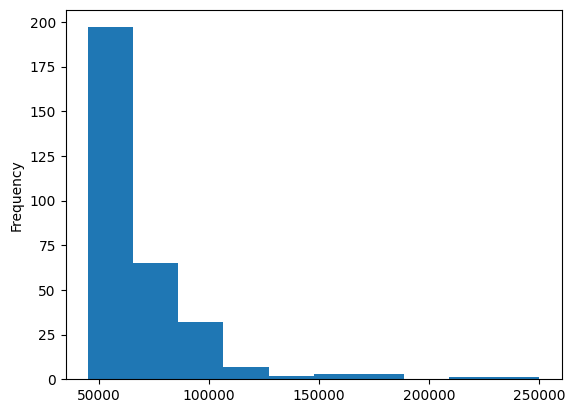

In [ ]:
# 7. Find the distribution of employee salaries (using matplotlib histogram)
df['Salary'].plot(kind='hist')


In [ ]:
# 8. What is the average age of employees at the company (Use DOB column)
df['DOB'] = pd.to_datetime(df['DOB'], format="%m/%d/%y", errors='coerce')

today = pd.to_datetime("today")
df['Age'] = ((today - df['DOB']).dt.days // 365.25).astype(int)
df[['DOB', 'Age']].head()


,DOB,Age
0,1983-07-10,42
1,1975-05-05,50
2,1988-09-19,36
3,1988-09-27,36
4,1989-09-08,35


In [ ]:
# 9. How many employees are still employed vs terminated
df['EmploymentStatus'].value_counts()

,count
EmploymentStatus,
Active,207
Voluntarily Terminated,88
Terminated for Cause,16


<Axes: xlabel='Department', ylabel='count'>

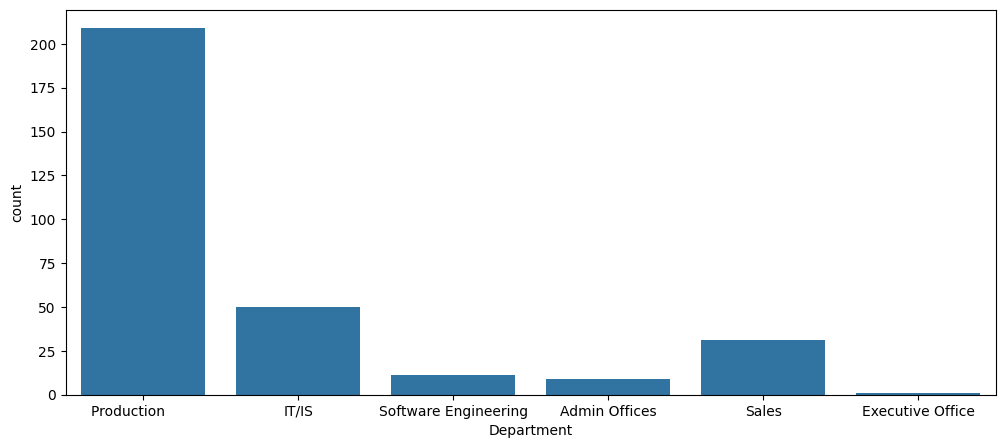

In [ ]:
# 10. Which departments have the most employees
df['Department'].value_counts()

# visualize using seaborn count plot
plt.figure(figsize= (12,5))
sns.countplot(x='Department', data=df)


### Part B: Business Analysis

In [ ]:
# 11. What is the average salary per department
df.groupby('Department')['Salary'].mean()

,Salary
Department,
Admin Offices,71791.888889
Executive Office,250000.000000
IT/IS,97064.640000
Production,59953.545455
Sales,69061.258065
Software Engineering,94989.454545


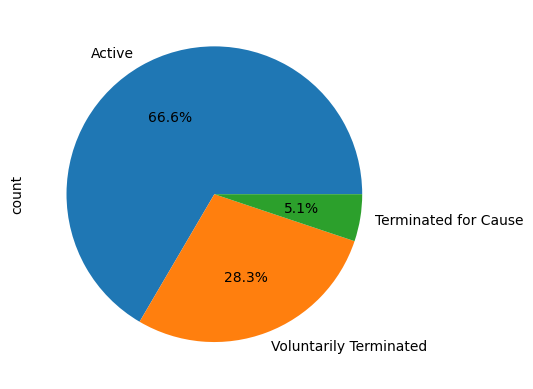

In [ ]:
# 12. Find the distribution of employment status (Active, Voluntarily Terminated, etc.)
# Visualization using Seaborn pie chart with Matplotlib
df['EmploymentStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Sex', ylabel='Salary'>

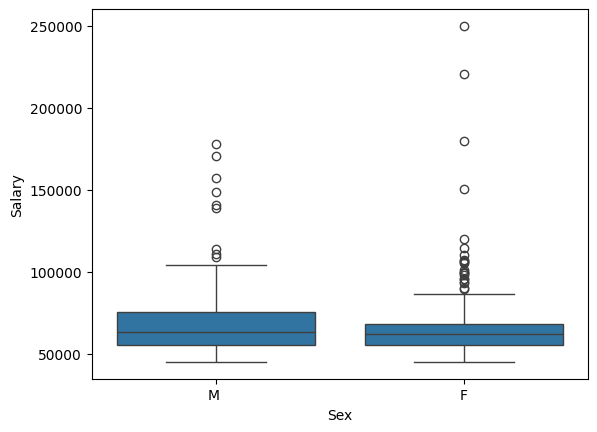

In [ ]:
# 13. Compare salary levels between Male and Female employees.

# comparison using seaborn boxplot
sns.boxplot(x='Sex', y='Salary', data=df)

In [ ]:
# 14. Which recruitment source brings in the most employees
df['RecruitmentSource'].value_counts()

,count
RecruitmentSource,
Indeed,87
LinkedIn,76
Google Search,49
Employee Referral,31
Diversity Job Fair,29
CareerBuilder,23
Website,13
Other,2
On-line Web application,1


In [ ]:
# 15. What percentage of employees attended a Diversity Job Fair
df['FromDiversityJobFairID'].value_counts(normalize=True) * 100



,proportion
FromDiversityJobFairID,
0,90.675241
1,9.324759


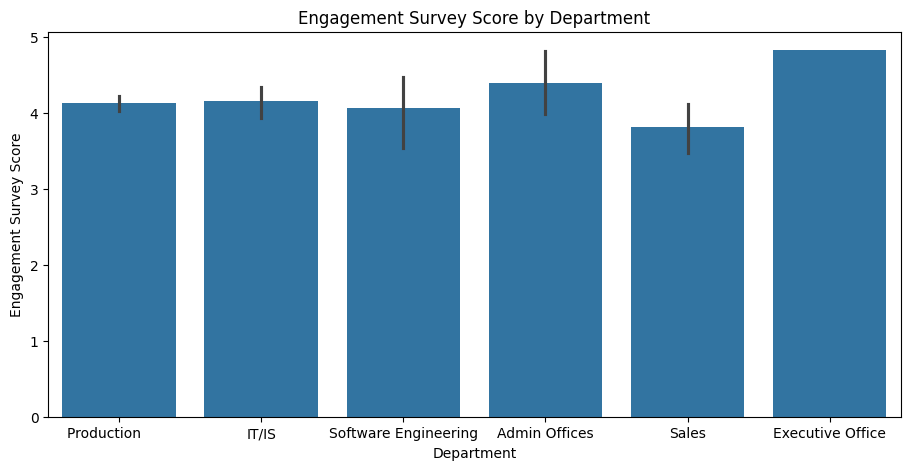

In [ ]:
# 16. Compare engagement survey scores across different departments (using a seaborn barplot, with labels)
plt.figure(figsize= (11,5))
sns.barplot(x='Department', y='EngagementSurvey', data=df)
plt.xlabel('Department')
plt.ylabel('Engagement Survey Score')
plt.title('Engagement Survey Score by Department')
plt.show()



In [ ]:
# 17. Which race has the highest average salary
df.groupby('RaceDesc')['Salary'].mean()

,Salary
RaceDesc,
American Indian or Alaska Native,65806.000000
Asian,68521.206897
Black or African American,74431.025000
Hispanic,83667.000000
Two or more races,59998.181818
White,67287.545455


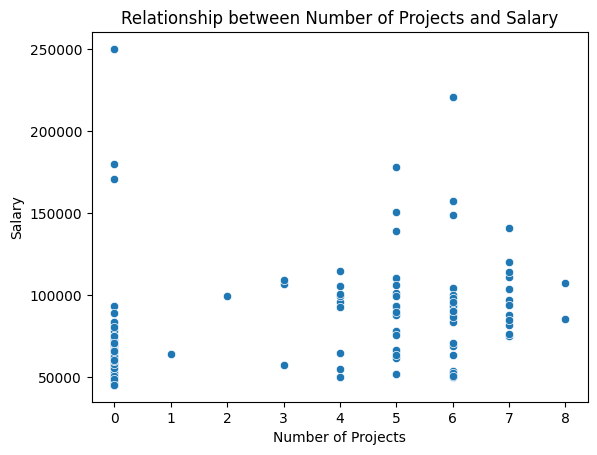

In [ ]:
# 18. What is the relationship between number of projects (SpecialProjectsCount) and salary?
sns.scatterplot(x=df['SpecialProjectsCount'], y=df['Salary'])
plt.xlabel('Number of Projects')
plt.ylabel('Salary')
plt.title('Relationship between Number of Projects and Salary')
plt.show()

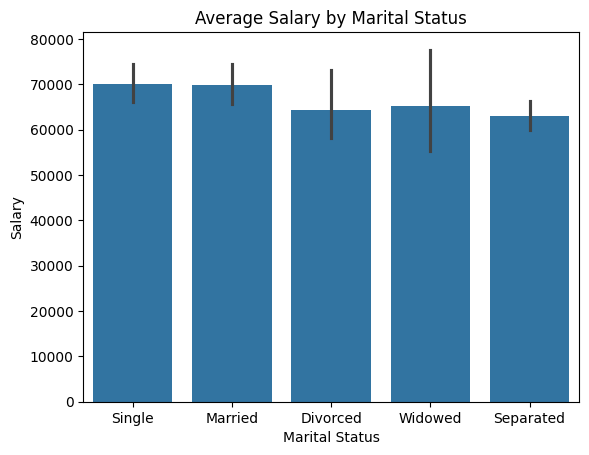

In [ ]:
# 19. Do married employees earn more on average than single employees
sns.barplot(x=df['MaritalDesc'], y=df['Salary'])
plt.xlabel('Marital Status')
plt.ylabel('Salary')
plt.title('Average Salary by Marital Status')
plt.show()

In [ ]:
# 20. Which managers have the largest teams
df.groupby('ManagerName').size()

,0
ManagerName,
Alex Sweetwater,9
Amy Dunn,21
Board of Directors,2
Brandon R. LeBlanc,7
Brannon Miller,22
Brian Champaigne,8
David Stanley,21
Debra Houlihan,3
Elijiah Gray,22


### Part C: Data Visualization

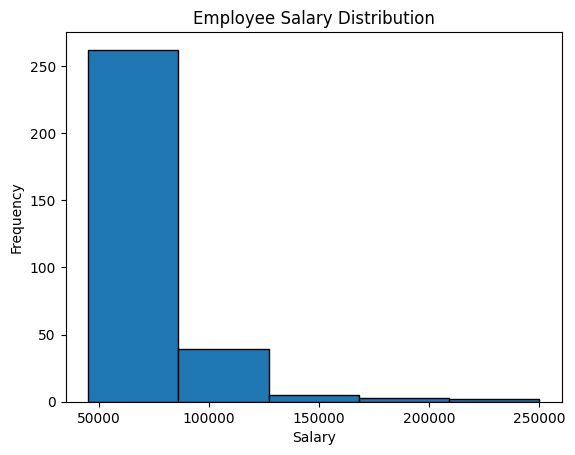

In [ ]:
# 21. Plot the salary distribution using histograms
plt.hist(df['Salary'],bins=5,edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Employee Salary Distribution')
plt.show()

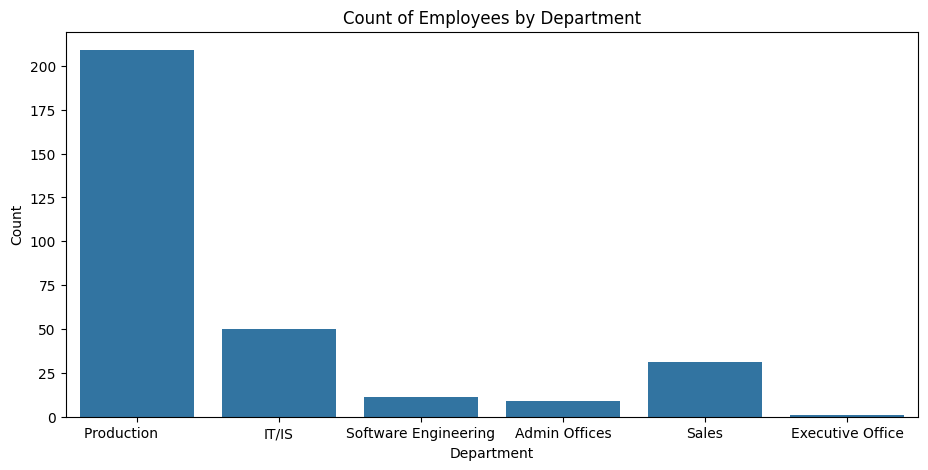

In [ ]:
# 22. Show the count of employees by department
plt.figure(figsize= (11,5))
sns.countplot(x='Department', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Employees by Department')
plt.show()

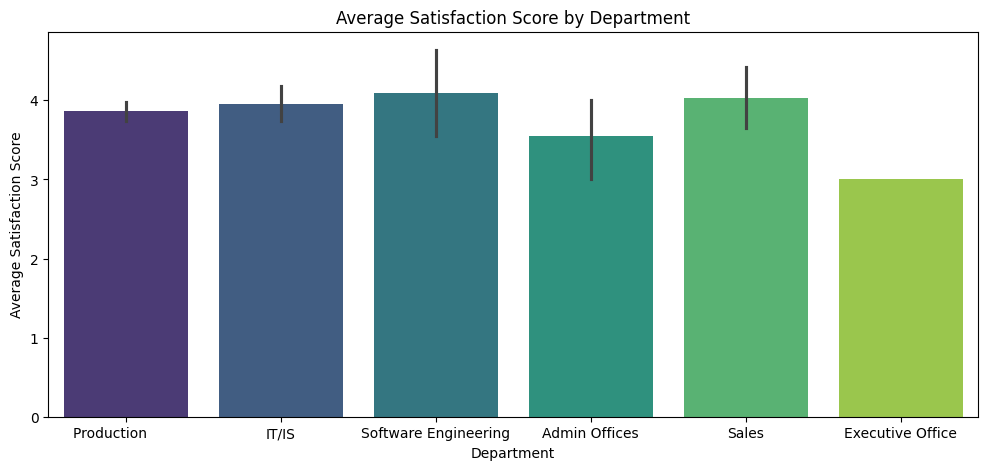

In [ ]:
# 23. Compare average satisfaction score by department
plt.figure(figsize= (12,5))
sns.barplot(x='Department', y='EmpSatisfaction', data=df, estimator='mean', hue='Department', palette='viridis')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Department')
plt.show()

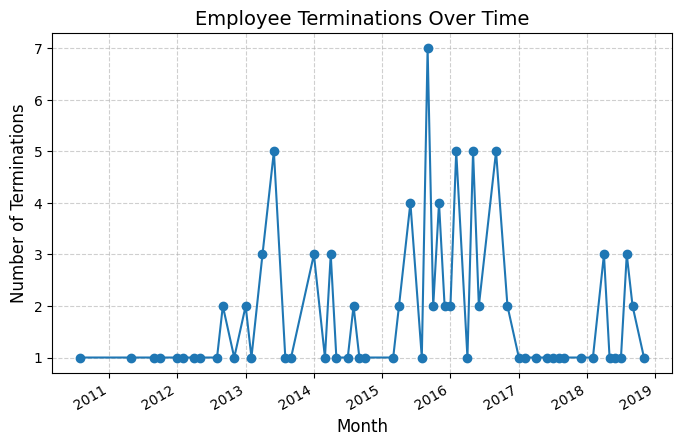

In [ ]:
# 24. Visualize employee terminations over time (Using Pandas Datetime Plot)

# Convert to datetime
df["DateofTermination"] = pd.to_datetime(df["DateofTermination"])

# Group by month to count terminations
terminations_over_time = df.groupby(df["DateofTermination"].dt.to_period("M")).size()

# Convert period index back to timestamp for plotting
terminations_over_time.index = terminations_over_time.index.to_timestamp()

# Plot
plt.figure(figsize=(8,5))
terminations_over_time.plot(kind="line", marker="o")

# Labels and title
plt.title("Employee Terminations Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Terminations", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

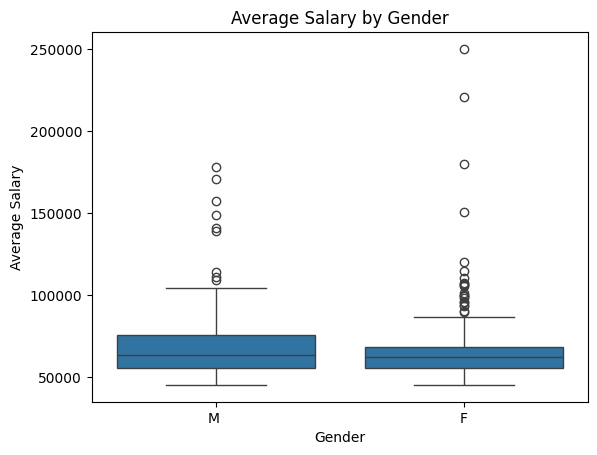

In [ ]:
# 25. Plot average salary by gender using a boxplot
sns.boxplot(x='Sex', y='Salary', data=df)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender')
plt.show()

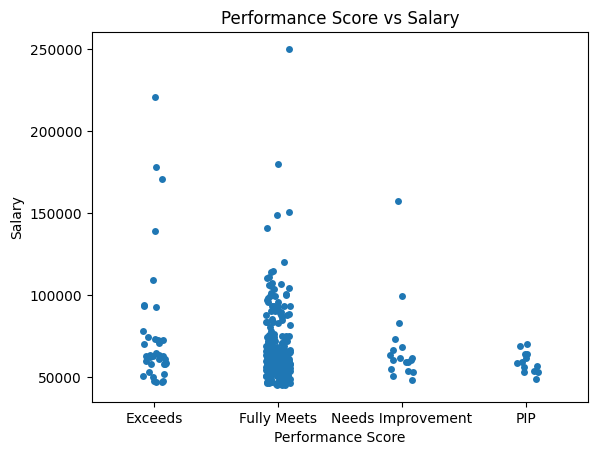

In [ ]:
# 26. Visualize performance scores vs salary (using Seaborn Strip plot)
sns.stripplot(x='PerformanceScore', y='Salary', data=df)
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.title('Performance Score vs Salary')
plt.show()

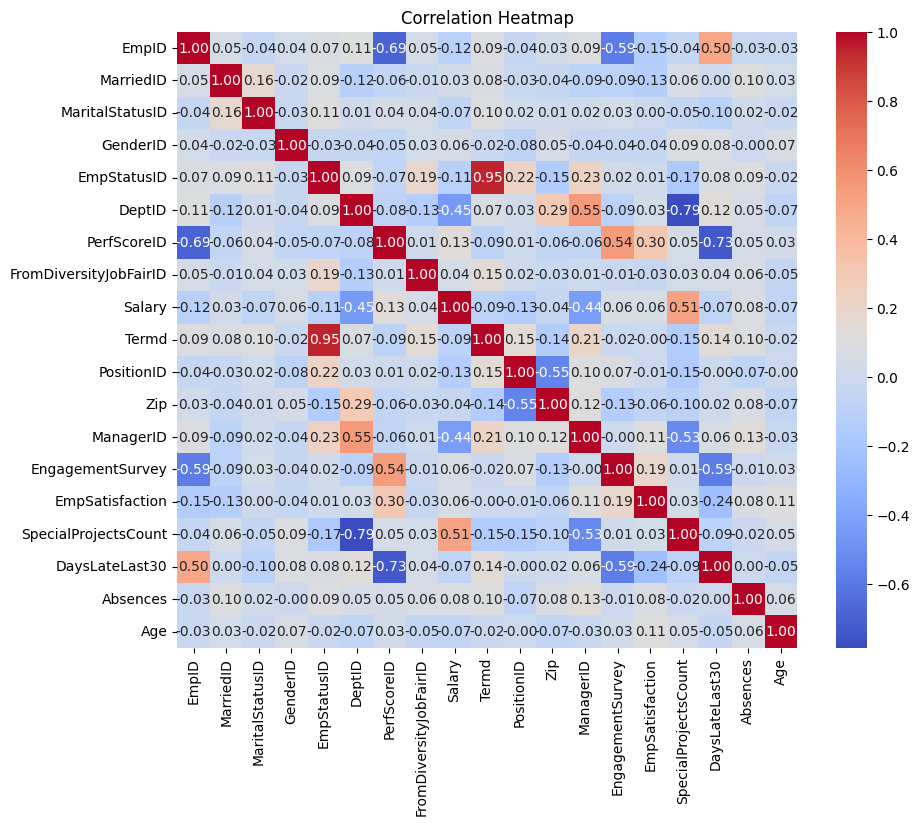

In [ ]:
# 27. Create a heatmap of correlations between numeric variables

numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

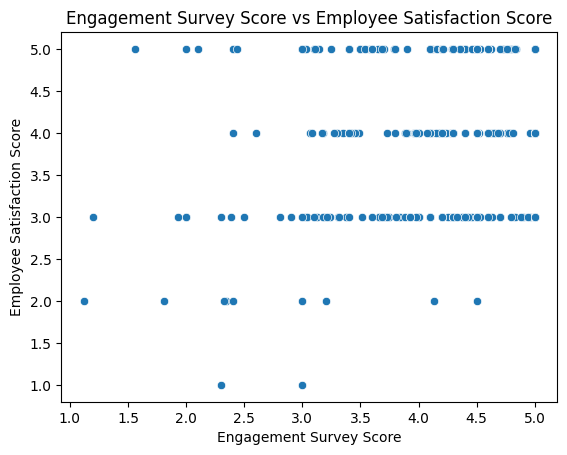

In [ ]:
# 28. Plot engagement survey score vs satisfaction score (using Seaborn scatterplot)
sns.scatterplot(x='EngagementSurvey', y='EmpSatisfaction', data=df)
plt.xlabel('Engagement Survey Score')
plt.ylabel('Employee Satisfaction Score')
plt.title('Engagement Survey Score vs Employee Satisfaction Score')
plt.show()

<Axes: xlabel='Department'>

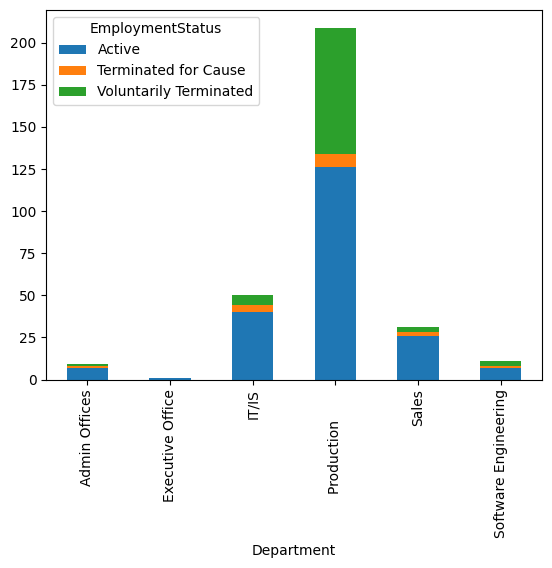

In [ ]:
# 29. Show a stacked bar chart of employee status across departments (using Matplotlib stacked bar)
df_status = df.groupby(['Department', 'EmploymentStatus']).size().unstack()
df_status.plot(kind='bar', stacked=True)

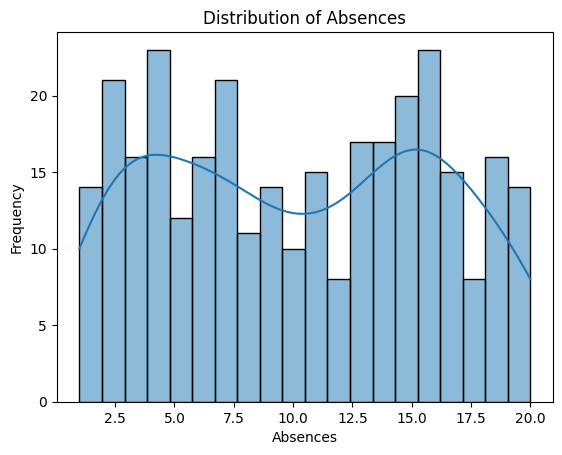

In [ ]:
# 30. Plot absenteeism (Absences) distribution among employees (using Seaborn Hisplot)
sns.histplot(df['Absences'], bins=20, kde=True)
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.title('Distribution of Absences')
plt.show()

### Part D: PCA (Dimensionality Reduction)

In [ ]:
# 31. Standardize numerical features before applying PCA (using Scikit-learn standard scaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

In [ ]:

df.dtypes

,0
Employee_Name,object
EmpID,int64
MarriedID,int64
MaritalStatusID,int64
GenderID,int64
EmpStatusID,int64
DeptID,int64
PerfScoreID,int64
FromDiversityJobFairID,int64
Salary,int64


In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_cols.tolist())

Numeric Columns: ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age']


In [ ]:
# 32. Perform PCA on the dataset and explain the first 2 components
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = imputer.fit_transform(df_scaled)

pca = PCA(n_components=19)
df_pca = pca.fit_transform(df_scaled_imputed)


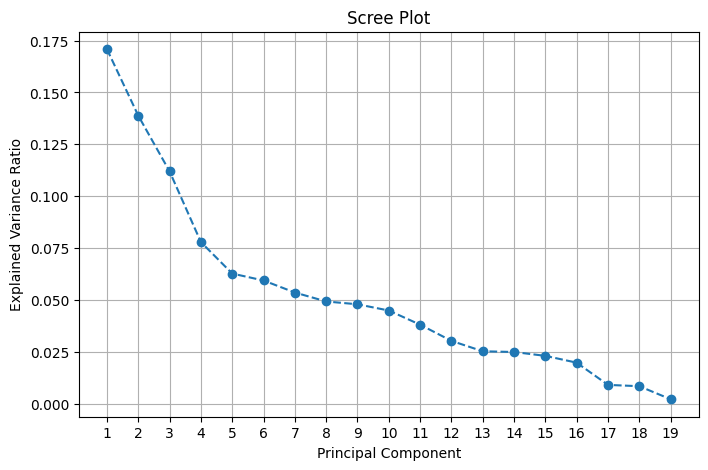

In [ ]:
# 33. Plot the explained variance ratio for the PCA components (plot using Matplotlib scree Plot)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# --- Scree Plot ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()

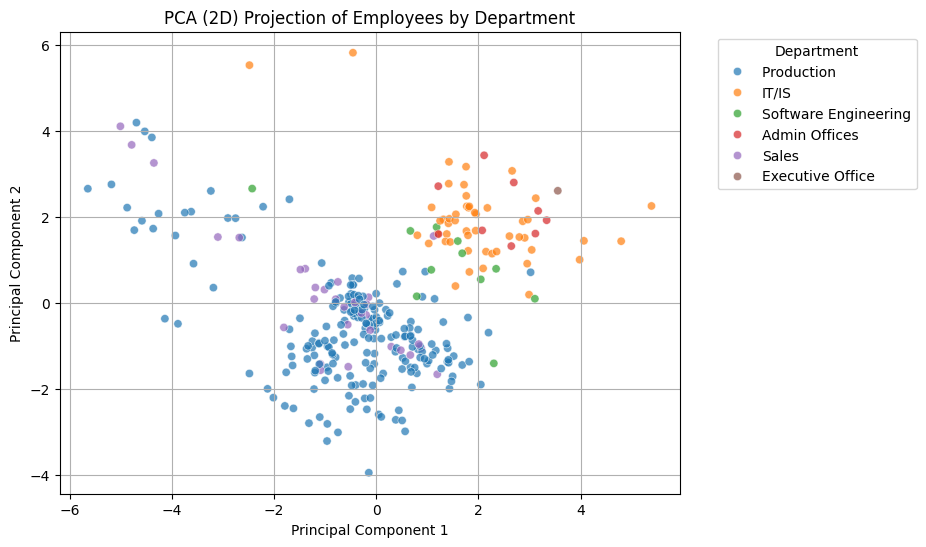

In [ ]:
# 34. Reduce the dataset to 2 dimensions with PCA and plot employees colored by department (plot using Seaborn Scatter plot)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled_imputed)

# Create PCA DataFrame
pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
pca_df["Department"] = df["Department"].values   # keep department info for coloring

# Plot with Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Department",   # color by department
    palette="tab10",
    alpha=0.7
)
plt.title("PCA (2D) Projection of Employees by Department")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [ ]:
# 35. Which variables contribute most to the first principal component (using PCA components)
# After fitting PCA
loadings = pd.DataFrame(
    pca.components_,          # each row = principal component
    columns = numeric_columns.columns,   # original feature names
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print (loadings)

        EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID    DeptID  \
PC1 -0.363687  -0.013707        -0.006183 -0.001977    -0.202451 -0.317746   
PC2  0.283559   0.078264        -0.096675  0.106113    -0.240770 -0.318337   

     PerfScoreID  FromDiversityJobFairID    Salary     Termd  PositionID  \
PC1     0.394185               -0.021678  0.272747 -0.209803   -0.049298   
PC2    -0.325734                0.005415  0.260970 -0.207010   -0.173860   

          Zip  ManagerID  EngagementSurvey  EmpSatisfaction  \
PC1 -0.076977  -0.272186          0.329545         0.143891   
PC2  0.040676  -0.340287         -0.325663        -0.190187   

     SpecialProjectsCount  DaysLateLast30  Absences       Age  
PC1              0.306805       -0.378252 -0.018676  0.044650  
PC2              0.371291        0.291218 -0.061542 -0.010317  


In [ ]:
pc1_loadings = loadings.loc["PC1"].sort_values(ascending=False)

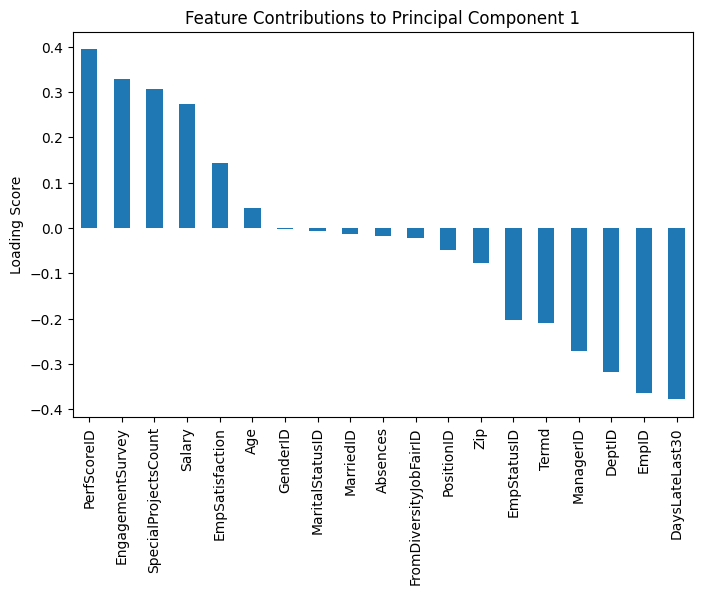

In [ ]:
plt.figure(figsize=(8,5))
pc1_loadings.plot(kind="bar")
plt.title("Feature Contributions to Principal Component 1")
plt.ylabel("Loading Score")
plt.show()

In [ ]:
# 36. Apply PCA to engagement + satisfaction + absences
# Select relevant columns
features = ['EngagementSurvey', 'EmpSatisfaction', 'Absences']
X = df[features]

#Convert scaled data back into DataFrame
hr_scaled_df = pd.DataFrame(df_scaled, columns=numeric_columns.columns)

#Select wellbeing features
wellbeing_features = hr_scaled_df[['EngagementSurvey', 'EmpSatisfaction', 'Absences']]

#Apply PCA
pca_wellbeing = PCA()
pca_wellbeing.fit(wellbeing_features)

print("Explained Variance Ratio:", pca_wellbeing.explained_variance_ratio_)
print("Cumulative variance:", explained_variance.cumsum())

Explained Variance Ratio: [0.39958328 0.33535499 0.26506173]
Cumulative variance: [0.17082264 0.30965622 0.42164737 0.49960796 0.5624027  0.62186891
 0.67554241 0.72490694 0.77291268 0.81791633 0.85610377 0.8864949
 0.91187387 0.93690185 0.96006776 0.97996242 0.98915719 0.99771029
 1.        ]


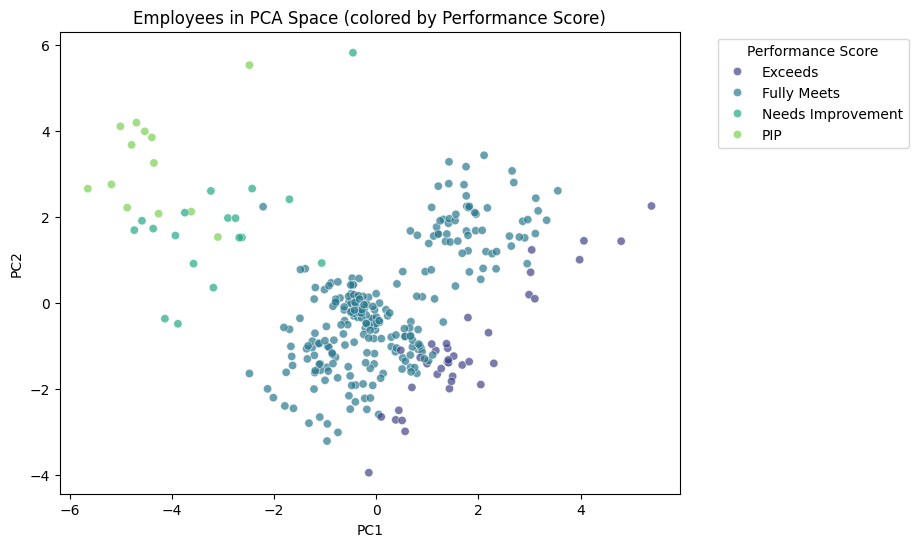

In [ ]:
# 37. Visualize employees in PCA-reduced 2D space grouped by PerformanceScore (using Seaborn Hue in scatterplot)
# Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
plt.figure(figsize=(8,6))
sns.scatterplot(
 x=df_pca[:,0], y=df_pca[:,1],
 hue=df['PerformanceScore'],
 palette='viridis', alpha=0.7
)
plt.title("Employees in PCA Space (colored by Performance Score)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Performance Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# 38. Compare clustering before and after PCA using k-means on numeric data (using Scikit-learn KMeans)

#Clustering on raw numeric data
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(df_scaled_imputed)
sil_raw = silhouette_score(df_scaled_imputed, labels_raw)

#Clustering on PCA-reduced data (2D)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca[:, :2]) # first 2 PCs
sil_pca = silhouette_score(df_pca[:, :2], labels_pca)

print("Silhouette Score (Raw):", sil_raw)
print("Silhouette Score (PCA 2D):", sil_pca)

Silhouette Score (Raw): 0.11143423872065586
Silhouette Score (PCA 2D): 0.5592174484087676


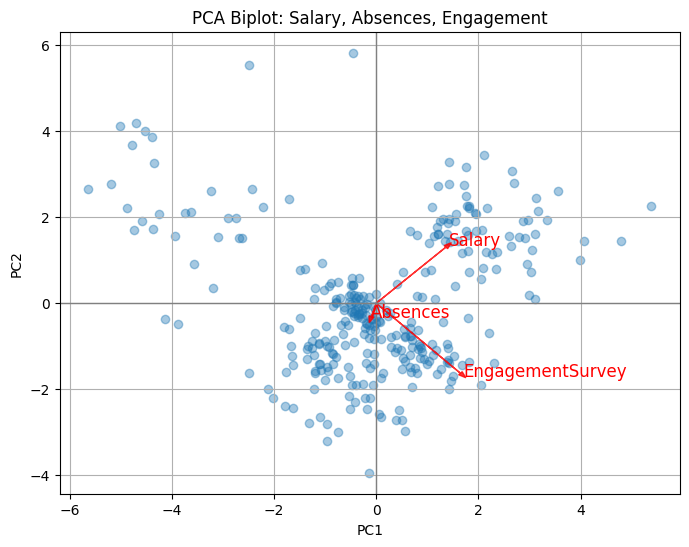

In [ ]:
# 39. Plot loadings of salary, absences, and engagement on the first 2 PCs.

# Scatterplot of employees in PC1-PC2 space
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.4)

# Loadings for selected features
features = ['Salary', 'Absences', 'EngagementSurvey']
loadings = pca.components_.T  # shape: (n_features, n_components)
selected_idx = [list(numeric_columns.columns).index(f) for f in features]

# Plot arrows for loadings
for i, idx in enumerate(selected_idx):
    plt.arrow(0, 0,
              loadings[idx,0]*5, loadings[idx,1]*5,  # scale up for visibility
              color='red', alpha=0.8, head_width=0.1)
    plt.text(loadings[idx,0]*5.2, loadings[idx,1]*5.2,  # slightly offset from arrow tip
             features[i], color='red', fontsize=12)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot: Salary, Absences, Engagement")
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

In [ ]:
# 40. Discuss when PCA is appropriate in HR analytics (e.g., reducing survey dimensions).


Principal Component Analysis (PCA) is especially valuable in HR analytics when the data involves many interrelated variables that need to be simplified. A common example is employee engagement or satisfaction surveys, where staff respond to dozens of questions touching on leadership, teamwork, career development, and workplace culture. Analyzing all these questions individually can be overwhelming, and in many cases, several questions end up measuring the same underlying theme.

PCA helps by reducing such high-dimensional data into fewer, uncorrelated components that still capture most of the variation in the responses. For instance, instead of working with twenty different survey items, PCA might reveal three or four key dimensions such as “job satisfaction,” “leadership effectiveness,” and “team collaboration.” This makes the analysis more manageable and highlights the core areas that matter most.

Example: Imagine an organization conducts a survey with 40 questions to understand employee satisfaction. Ten of those questions focus on communication, another ten on workload, another set on career development, and the rest on leadership and work-life balance. Instead of analyzing all 40 questions separately, PCA could group them into about four principal components that summarize the overall themes: communication, workload, career growth, and leadership. HR managers can then focus on improving these broader areas rather than trying to interpret every single survey question individually.

In practice, PCA is appropriate in HR analytics when the goal is to simplify complex data, avoid redundancy, and extract meaningful patterns for decision-making. By focusing on fewer dimensions, HR managers can gain clearer insights, design better interventions, and even build more reliable predictive models without being distracted by noise in the data.